In [38]:
import pandas 
from sklearn.datasets import load_iris

import matplotlib.pyplot 
import seaborn

import warnings 
warnings.filterwarnings('ignore')

In [39]:
iris = load_iris()

In [40]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [41]:
X = pandas.DataFrame(iris.data, columns = iris.feature_names)

In [42]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
Y = pandas.DataFrame(iris.target, columns=['Species'])

In [44]:
Y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [45]:
Y.Species.unique()

array([0, 1, 2])

In [46]:
Y.Species.replace({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}, inplace = True)

In [47]:
Y.Species.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [48]:
Y.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [49]:
df = pandas.concat([X, Y], axis=1)

In [50]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [51]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

<Axes: xlabel='sepal length (cm)', ylabel='Density'>

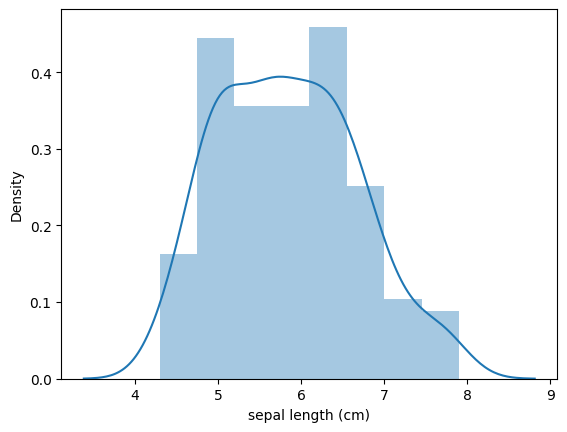

In [53]:
seaborn.distplot(df['sepal length (cm)'] )

<Axes: xlabel='sepal width (cm)', ylabel='Density'>

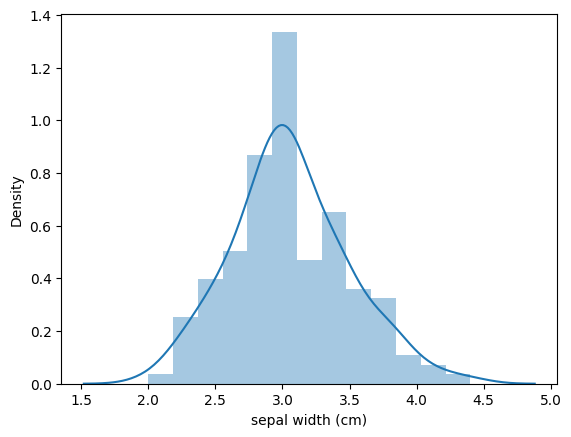

In [54]:
seaborn.distplot(df['sepal width (cm)'] )

<Axes: xlabel='petal length (cm)', ylabel='Density'>

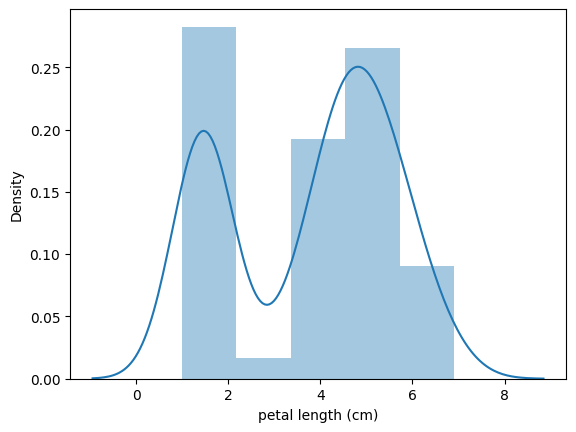

In [55]:
seaborn.distplot(df['petal length (cm)'] )

<Axes: xlabel='petal width (cm)', ylabel='Density'>

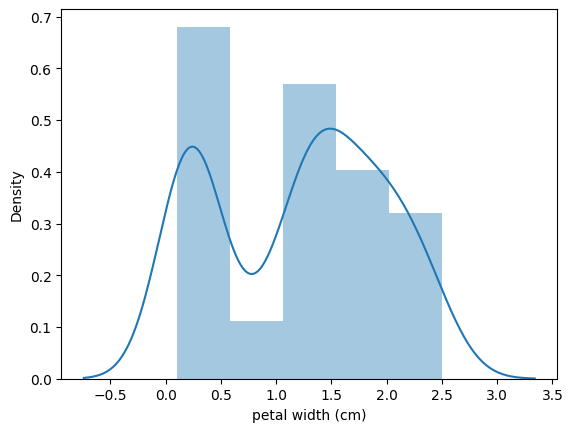

In [56]:
seaborn.distplot(df['petal width (cm)'] )

<Axes: ylabel='Species'>

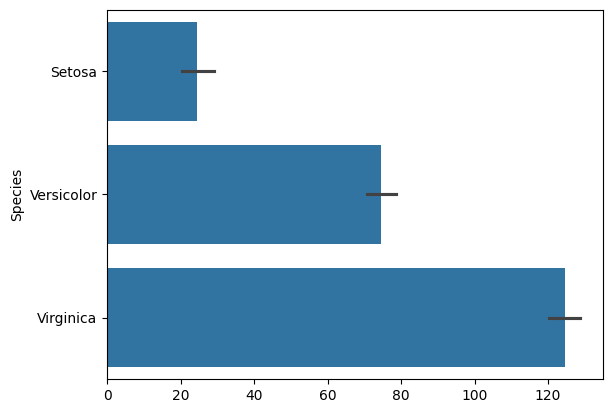

In [57]:
seaborn.barplot(df['Species'])

In [58]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [59]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)

In [61]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [62]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
Xpca = pca.fit_transform(X)


In [63]:
Xpca[:10]

array([[-0.63070293,  0.10757791],
       [-0.62290494, -0.10425983],
       [-0.6695204 , -0.05141706],
       [-0.65415276, -0.10288487],
       [-0.64878806,  0.13348758],
       [-0.53527278,  0.28961572],
       [-0.65653779,  0.01072449],
       [-0.6257805 ,  0.05713354],
       [-0.6756435 , -0.20070328],
       [-0.64564462, -0.06720801]])

In [64]:
X_pca = pandas.DataFrame(Xpca, columns=['PC1' , 'PC2'])

In [65]:
X_pca.head()

,PC1,PC2
0,-0.630703,0.107578
1,-0.622905,-0.104260
2,-0.669520,-0.051417
3,-0.654153,-0.102885
4,-0.648788,0.133488


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)

In [67]:
X_train.shape, X_test.shape

((105, 2), (45, 2))

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [69]:
def kfold(estimator, input, target):
    return cross_val_score(estimator, input, target).mean() * 100

In [70]:
kfold(LogisticRegression(), X_train, Y_train)

89.5238095238095

In [71]:
kfold(RandomForestClassifier(), X_train, Y_train)

93.33333333333333

In [72]:
kfold(SVC(), X_train, Y_train)

95.23809523809523

In [74]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(SVC(), {
    'C': [0.5, 1, 2, 3]
})

clf.fit(X_train, Y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.5, 1, 2, 3]})

In [75]:
clf_df = pandas.DataFrame(clf.cv_results_)

In [76]:
clf_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003724,0.002501,0.006818,0.003937,0.5,{'C': 0.5},1.0,0.904762,0.904762,1.0,0.904762,0.942857,0.046657,4
1,0.004766,0.002023,0.002311,0.002446,1,{'C': 1},1.0,0.904762,0.904762,1.0,0.952381,0.952381,0.042592,2
2,0.007790,0.004296,0.003497,0.002316,2,{'C': 2},1.0,0.952381,0.904762,1.0,0.952381,0.961905,0.035635,1
3,0.000667,0.001335,0.003980,0.003047,3,{'C': 3},1.0,0.904762,0.904762,1.0,0.952381,0.952381,0.042592,2


In [77]:
clf_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [81]:
clf_df[['param_C', 'mean_test_score']].sort_values(by = 'mean_test_score', ascending = False)


,param_C,mean_test_score
2,2,0.961905
1,1,0.952381
3,3,0.952381
0,0.5,0.942857


In [82]:
model = SVC(C = 2)
model.fit(X_train, Y_train)

SVC(C=2)

In [83]:
model.score(X_test, Y_test) * 100

97.77777777777777

In [85]:
pred = model.predict(X_test)

In [89]:
Y_test[:5]

,Species
73,Versicolor
18,Setosa
118,Virginica
78,Versicolor
76,Versicolor


In [90]:
pred[:5]

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor'],
      dtype=object)

In [92]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
  Versicolor       1.00      0.92      0.96        13
   Virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



Text(50.722222222222214, 0.5, 'Actual')

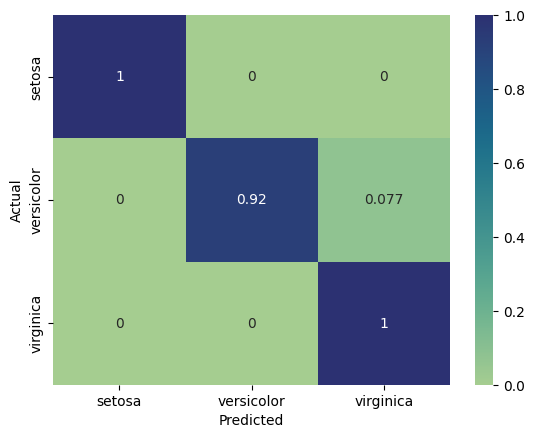

In [104]:
cf = confusion_matrix(Y_test, pred, normalize='true')
seaborn.heatmap(cf, annot = True, cmap='crest', xticklabels=iris.target_names, yticklabels=iris.target_names)
matplotlib.pyplot.xlabel('Predicted')
matplotlib.pyplot.ylabel('Actual')